<p> <font size=4> 1. Predator / Prey / Food</font> <br><br>

Download this data<br>
Preview the document<br>
View in a new window.<br><br>

Its data from the early part of last century on Wolf (predator) populations, Rabbits (prey), and Carrots (rabbit food!) each year.<br> <br>

Make a plot that looks (more or less) like this:<br><br>

</p>

In [1]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [2]:
df = pd.read_csv('C:\\Users\\lastt\\Documents\\analytic\\visualization\\ecology.dat', sep='\t', header=0)

df.head(5)

,# year,rabbit,wolf,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [3]:
y_rab=df.loc[:,"rabbit"]
y_wo=df.loc[:,"wolf"]
y_ca = df.loc[:,"carrot"]
y_rab[1:3]

1    47200.0
2    70200.0
Name: rabbit, dtype: float64

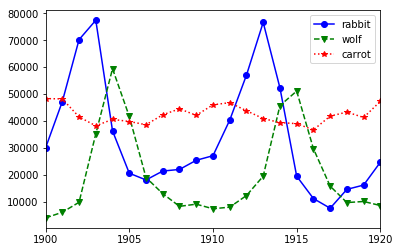

In [4]:
ax = plt.axes()
x_val= df.loc[:, "# year"]
x= x_val
y= y_rab
y1= y_wo
#to change x-axis range
ax.set(xlim=(1900, 1920))
#to change x-tick interval
plt.xticks( range(1900,1925,5) )
gr=plt.plot(x,y, "-ok", color="blue");
gr=plt.plot(x,y1, "--vk", color="green");
gr=plt.plot(x,y_ca, ":*k", color="red");
plt.legend();

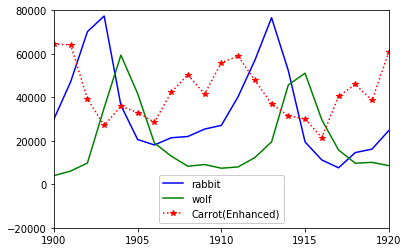

In [5]:

ax = plt.axes()
x_val= df.loc[:, "# year"]
x1= x_val
y= y_rab
y1= y_wo

#To amplify the carrot value,
normalized_y_ca= (y_ca-min(y_ca)) /(max(y_ca)-min(y_ca))
y_scaled=(normalized_y_ca+0.5) *43000
# rearrange the range of x-axis and y-axis.
ax.set(xlim=(1900, 1920), ylim=(-20000, 80000))

plt.xticks( range(1900,1925,5) )

gr1=plt.plot(x1,y, "-b")
gr1=plt.plot(x1,y1, "-g")
gr1=plt.plot(x1,y_scaled, ":*k", color="red", label="Carrot(Enhanced)")

plt.legend(loc="lower center", framealpha=1);

<p><font size=5> 2. Analyze Runners</font> </p>

In [6]:

racetime= pd.read_csv('C:\\Users\\lastt\\Documents\\analytic\\visualization\\racetimes.txt', sep='\n', header=None
                     , names=["racetimes"])
racetime.tail(5)

,racetimes
838,171.38
839,173.52
840,190.70
841,219.41
842,140.92


In [7]:

# the mean time for racetimes
racetime.mean(axis=0)

racetimes    274.642716
dtype: float64

In [8]:
x= racetime.loc[:,"racetimes"]
print("The whole groups' race time mean and sigma are shown below ")
print("mean = {}".format(x.mean()))

print("sigma= {}".format(x.std()))

The whole groups' race time mean and sigma are shown below 
mean = 274.6427164887306
sigma= 102.26132264972105


In [9]:
racetime.min(axis=0)

racetimes    121.18
dtype: float64

In [10]:

bincount=len(racetime.index)
bincount

843

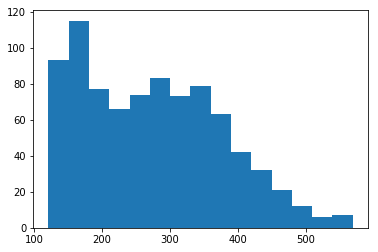

In [11]:
%matplotlib inline
import numpy as np

x= racetime.loc[:,"racetimes"]
plt.hist(x, bins=15)
counts, edges =  np.histogram(x, bins=30);

<p> <font color="red">As shown above, the entire data histogram shows bimodal.<br> Based on the shape of this histogram,  I will seperate the entire data set into two groups, fast group and average group. The break point will be the race time of 250.</font></p>

In [12]:

# to divide the data into two groups, average and fast,
# I use the histogram shape of the overall data.
# Therefore, the break point is 250.
average_gr = racetime[racetime.racetimes>= 250]
fast_gr = racetime[racetime.racetimes< 250]

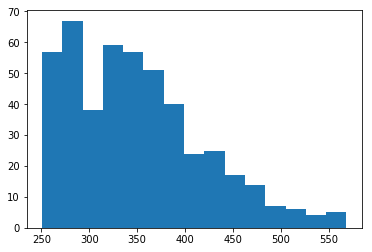

In [13]:
#average group information.
av = average_gr.racetimes
plt.hist(av, bins=15)
av_counts, av_edges = np.histogram(av, bins=15)

In [14]:
av_counts

array([57, 67, 38, 59, 57, 51, 40, 24, 25, 17, 14,  7,  6,  4,  5], dtype=int64)

In [15]:
av_edges

array([ 250.61 ,  271.812,  293.014,  314.216,  335.418,  356.62 ,
        377.822,  399.024,  420.226,  441.428,  462.63 ,  483.832,
        505.034,  526.236,  547.438,  568.64 ])

In [16]:
#to get widths of each bin

av_widths = np.diff(av_edges)
av_widths

array([ 21.202,  21.202,  21.202,  21.202,  21.202,  21.202,  21.202,
        21.202,  21.202,  21.202,  21.202,  21.202,  21.202,  21.202,
        21.202])

In [17]:

av_bincenters = av_edges[:-1] +av_widths/2
av_bincenters

array([ 261.211,  282.413,  303.615,  324.817,  346.019,  367.221,
        388.423,  409.625,  430.827,  452.029,  473.231,  494.433,
        515.635,  536.837,  558.039])

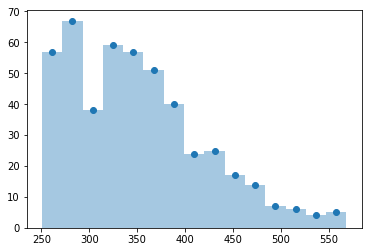

In [18]:

%matplotlib inline

plt.scatter(av_bincenters, av_counts)
plt.hist(av, bins=15, alpha=0.4);

In [19]:
#gaussian function
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2/(2*sigma**2))

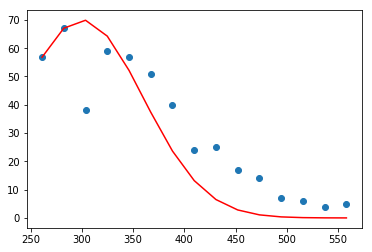

In [20]:

%matplotlib inline


plt.scatter(av_bincenters, av_counts)
plt.plot(av_bincenters, gaussian(av_bincenters, 300, 60, 70), 'r')



In [21]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gaussian, av_bincenters, av_counts, p0=[300, 60, 70])

In [22]:
popt

array([ 293.28132887,  103.86218446,   58.36606773])

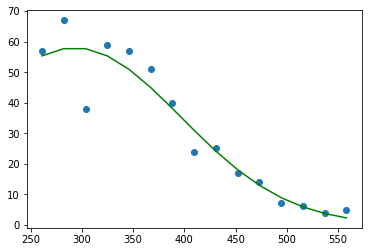

In [23]:
plt.scatter(av_bincenters, av_counts)
plt.plot(av_bincenters, gaussian(av_bincenters, 293, 104, 58), 'g')


In [24]:
print("The average groups' race time mean and sigma are shown below ")
print("mean = {}".format(av.mean()))

print("sigma= {}".format(av.std()))

The average groups' race time mean and sigma are shown below 
mean = 350.09212314225056
sigma= 69.47362187430379


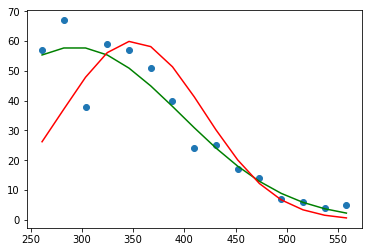

In [25]:
%matplotlib inline


plt.scatter(av_bincenters, av_counts)
plt.plot(av_bincenters, gaussian(av_bincenters, 293, 104, 58), 'g')
plt.plot(av_bincenters, gaussian(av_bincenters, 350,  69, 60 ), 'r')

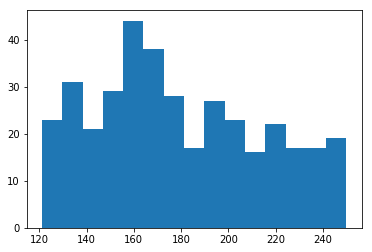

In [26]:
#fast group information
%matplotlib inline
fa = fast_gr.racetimes
plt.hist(fa, bins=15)
fa_counts, fa_edges = np.histogram(fa, bins=15);

In [27]:
fa_widths = np.diff(fa_edges)
fa_widths

array([ 8.582,  8.582,  8.582,  8.582,  8.582,  8.582,  8.582,  8.582,
        8.582,  8.582,  8.582,  8.582,  8.582,  8.582,  8.582])

In [28]:


fa_bincenters= fa_edges[:-1] + fa_widths/2
fa_bincenters


array([ 125.471,  134.053,  142.635,  151.217,  159.799,  168.381,
        176.963,  185.545,  194.127,  202.709,  211.291,  219.873,
        228.455,  237.037,  245.619])

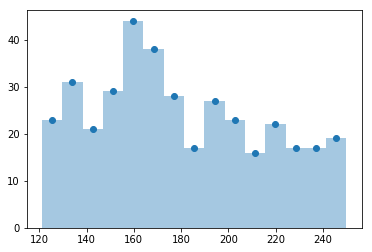

In [29]:
#to display the middle point of each bin in histogram
%matplotlib inline

plt.scatter(fa_bincenters, fa_counts)
plt.hist(fa, bins=15, alpha=0.4);

In [30]:
#gaussian function
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2/(2*sigma**2))

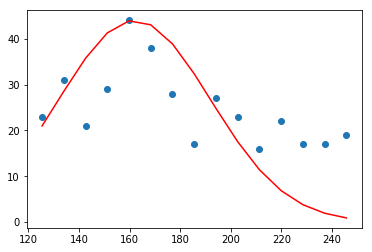

In [31]:

%matplotlib inline

plt.scatter(fa_bincenters, fa_counts)
plt.plot(fa_bincenters, gaussian(fa_bincenters, 162, 30, 44), 'r')


In [32]:


from scipy.optimize import curve_fit
fa_popt, fa_pcov = curve_fit(gaussian, fa_bincenters, fa_counts,p0=[162, 30, 44])

In [33]:
fa_popt

array([ 159.48963784,   67.41372157,   30.12165973])

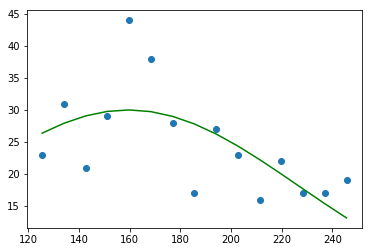

In [34]:
# to draw the plot based on the result of courve_fit function.

plt.scatter(fa_bincenters, fa_counts)
plt.plot(fa_bincenters, gaussian(fa_bincenters, 159.48, 67, 30), 'g')

<p><font color="red">As shown above, the curve_fit result does fit some data.<br> However, it is not perfect fit. There are some big gaps between actual data and fit-graph.<br>  </font> </p>

In [35]:
print("The fast groups' race time mean and sigma are shown below ")
print("mean = {}".format(fa.mean()))

print("sigma= {}".format(fa.std()))

The fast groups' race time mean and sigma are shown below 
mean = 179.11403225806444
sigma= 35.23604425817286


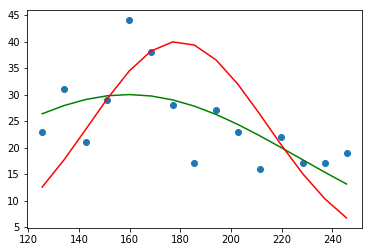

In [36]:


%matplotlib inline

plt.scatter(fa_bincenters, fa_counts)
plt.plot(fa_bincenters, gaussian(fa_bincenters, 159.48, 67, 30), 'g')
plt.plot(fa_bincenters, gaussian(fa_bincenters, 179.11, 35.23, 40), 'r');

<p><font color="red">As shown above, the gaussian funciton, which is for unimodal, does not work very well for the fast runner group, which is the multimodal.<br> Let me use seaborn function. </font> </p>

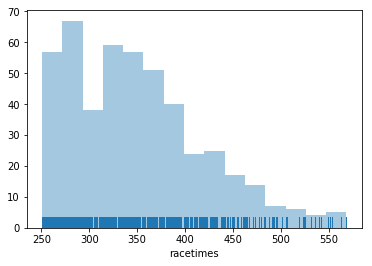

In [37]:
#To use seaborn function for average race time group,
# By putting a 'True' in rug parameter, i can see the density of each race time in this distribution. 
import seaborn as sns
sns.distplot(av, bins=15, kde=False, rug= True);

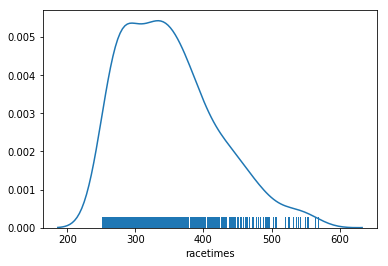

In [38]:

# let me draw the kernek density estimate to see the shape of distibution.
sns.distplot(av, hist=False, rug=True);

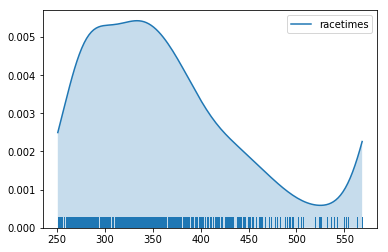

In [39]:
# This kdeplot provide almost same curve resulting from "displot" funciton, 
# but the kdeplot give more options such as shade and cut.
# With 'cut' parameter, the control the extent of containing the extrame value in the curve.
# The 'cut' parameter only has influence on the shape of the curve, not about how it fit.

sns.kdeplot(av, shade=True, cut=0)
sns.rugplot(av);

<p><font color="red"> Previously, we have the following information.<br>
The average groups' race time mean and sigma are shown below.<br> 
mean = 350.09212314225056 <br>
sigma= 69.47362187430379 <br>
Based on the distribution curve above, I can assume that the mean is loacted around 350.
</font> </p>

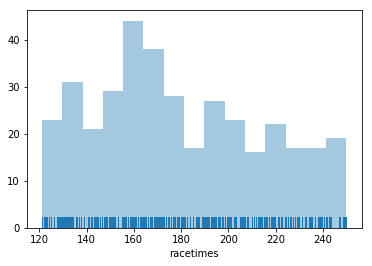

In [40]:
# To employ seaborn function to a fast race group

import seaborn as sns
sns.distplot(fa, bins=15, kde=False, rug=True);

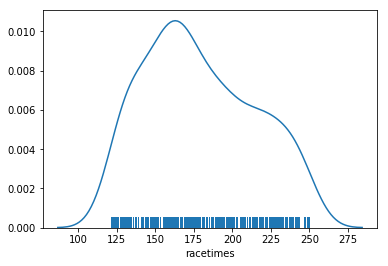

In [41]:
# To see the distribution shape of this fast group.

sns.distplot(fa, bins=15, hist=False, rug= True);

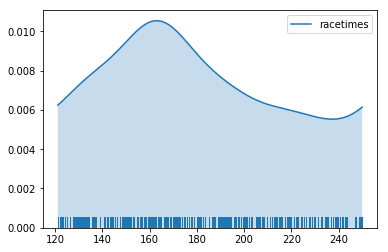

In [42]:
#By using 'cut' parameter, let me change the containment of extreme values, outliers.

sns.kdeplot(fa, shade=True, cut=0)
sns.rugplot(fa);

<p><font color="red">In the above, by using 'cut=0' parameter, i do not want include any extreme value.<br>
As a result, the both ends shape of the distributon grape is changed.<br>
In the previous section, I got the following information about the fast group.<br>
The fast groups' race time mean and sigma are shown below. <br>
mean = 179.11403225806444<br>
sigma= 35.23604425817286<br>
Although it is not clear as the average group, at least I can assume that the mean race time for this fast group is greater than 180.<br>
This distributin graph is much better than the gaussian function for the multimodal. </font></p>

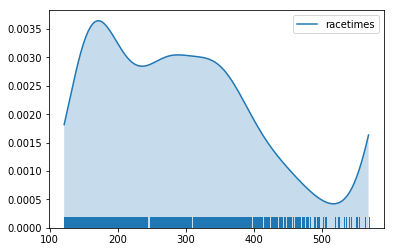

In [43]:
# to see the distribution graph for whole data.
x= racetime.loc[:,"racetimes"]
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

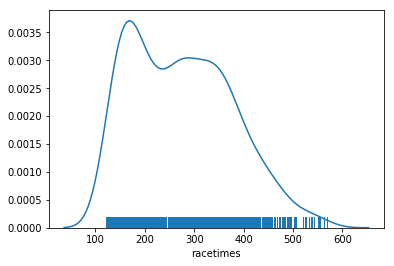

In [45]:
sns.distplot(x, bins=15, hist=False, rug= True);

<p><font color="red">As shown above, the whole data distribution of race-time indicates the bimodal feature. </font> </p>